In [157]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [158]:
proj_path = os.path.join((os.getcwd()),os.path.pardir)
raw_path = os.path.join(proj_path, "data","raw")
train_file_path=os.path.join(raw_path, "train.csv")
test_file_path=os.path.join(raw_path, "test.csv")
train_df = pd.read_csv(train_file_path, index_col="PassengerId")
test_df = pd.read_csv(test_file_path, index_col="PassengerId")
test_df['Survived']=-999
titanic_df = pd.concat((train_df,test_df))

In [159]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [160]:
titanic_df[titanic_df["Embarked"].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [161]:
titanic_df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [162]:
titanic_df[titanic_df.Survived!=-999].groupby(["Embarked","Survived"]).Survived.count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

In [163]:
titanic_df[titanic_df.Survived!=-999].groupby(["Embarked","Survived"]).agg({"Survived":"count"})
#tdf_sur = titanic_df[titanic_df.Survived!=-999].groupby(["Embarked","Survived"]).agg({"Survived":"count"});
#tdf_sur.groupby(level=0).apply(lambda x : x/x.sum())

Survived
Embarked Survived          
C        0               75
         1               93
Q        0               47
         1               30
S        0              427
         1              217

In [164]:
#tdf_sur = titanic_df[titanic_df.Survived!=-999].groupby(["Embarked","Pclass"]).agg({"Fare":"median"});
#tdf_sur.groupby(level=0).apply(lambda x : x/x.sum())
titanic_df[titanic_df.Survived!=-999].groupby(["Embarked","Pclass"]).agg({"Fare":"median"})

Fare
Embarked Pclass         
C        1       78.2667
         2       24.0000
         3        7.8958
Q        1       90.0000
         2       12.3500
         3        7.7500
S        1       52.0000
         2       13.5000
         3        8.0500

In [165]:
tdf_sur = titanic_df[titanic_df.Survived!=-999].groupby(["Embarked","Sex"]).agg({"Survived":"count"});
tdf_sur.groupby(level=0).apply(lambda x : x/x.sum())

Survived
Embarked Sex             
C        female  0.434524
         male    0.565476
Q        female  0.467532
         male    0.532468
S        female  0.315217
         male    0.684783

In [166]:
pd.crosstab(titanic_df.Embarked, titanic_df.Survived)

Survived,-999,0,1
Embarked,,,
C,102,75,93
Q,46,47,30
S,270,427,217


In [167]:
titanic_df.Embarked.fillna('C',inplace=True)

In [168]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [169]:
titanic_df.loc[titanic_df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-999,3701


In [170]:
titanic_df[((titanic_df.Embarked=="S") & (titanic_df.Pclass==3))].Fare.median()

8.05

In [171]:
titanic_df.Fare.fillna(titanic_df[((titanic_df.Embarked=="S") & (titanic_df.Pclass==3))].Fare.median(),inplace=True)

In [172]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [173]:
pd.options.display.max_rows=10
titanic_df[titanic_df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,3,female,0,-999,334915
1302,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,female,0,-999,365237
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-999,A.5. 3236


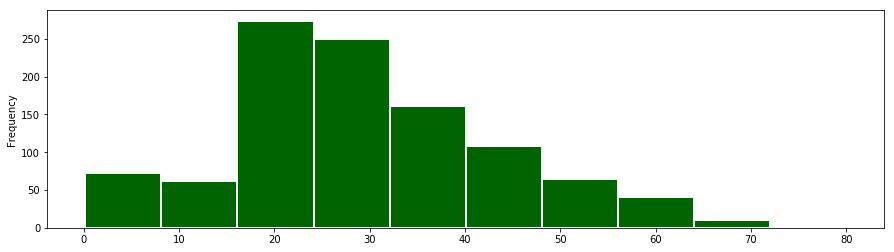

In [174]:
%matplotlib inline
titanic_df.Age.plot(kind="hist",figsize=(15,4), edgecolor='white', linewidth=2, color="darkgreen");

In [175]:
print("Mean Age:",titanic_df.Age.mean(),"Median Age:",titanic_df.Age.median())

Mean Age: 29.881137667304014 Median Age: 28.0


In [176]:
titanic_df.groupby("Sex").Age.mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [177]:
titanic_df.groupby("Sex").Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

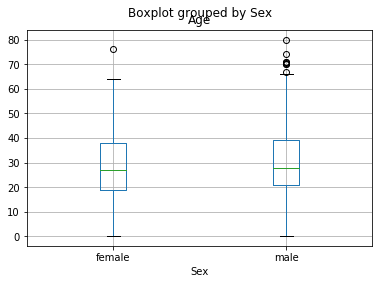

In [178]:
titanic_df[titanic_df["Age"].notnull()].boxplot('Age',"Sex");

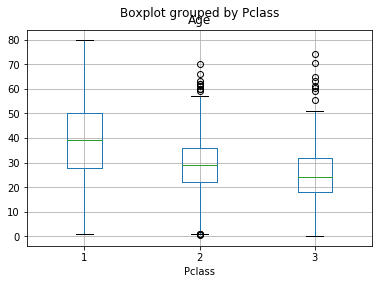

In [179]:
titanic_df[titanic_df["Age"].notnull()].boxplot('Age',"Pclass");

In [180]:
titanic_df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [181]:
getTitle = lambda name: name.split(",")[1].split('.')[0].strip().lower()
getTitle("Minahan, Mrs. William Edward (Lillian E Thorpe)")
titanic_df.Name.map(lambda nm: getTitle(nm));

In [182]:
#titanic_df.Name.map(getTitle)
# titanic_df.Name.map(lambda nm: getTitle(nm));
# x.unique()

In [183]:
titanic_df.Name.map(lambda nm: getTitle(nm)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [184]:
title_group = {'mr':'Mr',
'mrs':'Mrs',
'miss':'Miss',
'master':'Master',
'don':'Sir',
'rev':'Sir',
'dr':'Officer',
'mme':'Mrs',
'ms':'Mrs',
'major':'Officer',
'lady':'Lady',
'sir':'Sir',
'mlle':"Miss",
'col':'Officer',
'capt':'Officer',
'the countess':'Lady',
'jonkheer':"Sir",
'dona':"Lady"
}


In [185]:
getTitle = lambda name: title_group[name.split(",")[1].split('.')[0].strip().lower()]

In [186]:
titanic_df.Name.map(lambda nm: getTitle(nm)).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Sir', 'Officer', 'Lady'], dtype=object)

In [187]:
titanic_df['Title'] = titanic_df.Name.map(lambda nm: getTitle(nm))

In [188]:
titanic_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


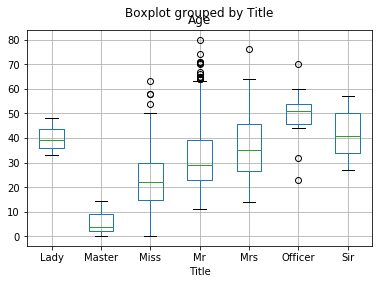

In [189]:
titanic_df[titanic_df.Age.notnull()].boxplot('Age',"Title");

In [190]:
title_age_median=titanic_df.groupby("Title").Age.transform('median')

In [191]:
title_age_median.head()

PassengerId
1    29.0
2    35.0
3    22.0
4    35.0
5    29.0
Name: Age, dtype: float64

In [192]:
titanic_df.Age.fillna(title_age_median,inplace=True)

In [193]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB


In [194]:
titanic_df[titanic_df.Survived.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,


In [197]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 172.9+ KB
